In [ ]:
import requests

import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

In [ ]:
# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=IBM&outputsize=full&apikey=JYNTJ5QG2A2803PT'
r = requests.get(url)
data = r.json()
print(data)

{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes', '2. Symbol': 'IBM', '3. Last Refreshed': '2024-05-14', '4. Output Size': 'Full size', '5. Time Zone': 'US/Eastern'}, 'Time Series (Daily)': {'2024-05-14': {'1. open': '167.8600', '2. high': '168.1300', '3. low': '166.4800', '4. close': '167.3600', '5. volume': '2600967'}, '2024-05-13': {'1. open': '167.5000', '2. high': '168.0600', '3. low': '166.7600', '4. close': '167.5600', '5. volume': '2414859'}, '2024-05-10': {'1. open': '167.1300', '2. high': '168.0700', '3. low': '166.3200', '4. close': '167.1500', '5. volume': '2255370'}, '2024-05-09': {'1. open': '167.5000', '2. high': '167.5500', '3. low': '165.8800', '4. close': '166.2700', '5. volume': '4266616'}, '2024-05-08': {'1. open': '168.0100', '2. high': '170.2600', '3. low': '167.9000', '4. close': '169.9000', '5. volume': '3522011'}, '2024-05-07': {'1. open': '169.0000', '2. high': '169.2900', '3. low': '167.9400', '4. close': '168.3800', '5. vo

In [ ]:
time_series_data = data['Time Series (Daily)']

df = pd.DataFrame(time_series_data).T.reset_index()
df.columns = ['date', 'open', 'high', 'low', 'adj_close', 'volume']

df['date'] = pd.to_datetime(df['date'])

start_date = '2023-11-07'
end_date = '2024-03-26'
filtered_df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

# Reverse the order to have the test set starting from '2023-11-07'
filtered_df = filtered_df[::-1]

test_set = filtered_df.head(5)
train_set = filtered_df.iloc[5:]

print("\nTest set:")
print(test_set)

print("Train set:")
print(train_set)


Test set:
          date      open      high       low adj_close   volume
129 2023-11-07  149.0300  149.2800  148.0300  148.8300  3549853
128 2023-11-08  149.2500  149.6800  147.5850  148.0300  3618588
127 2023-11-09  146.5500  146.9900  145.2800  146.6200  3412713
126 2023-11-10  147.4400  149.1700  146.8500  149.0200  3179541
125 2023-11-13  148.4600  148.4900  147.3500  148.1000  2647288
Train set:
          date      open      high       low adj_close   volume
124 2023-11-14  149.4500  150.8063  149.0500  150.4100  4321940
123 2023-11-15  150.4000  153.2200  150.4000  152.5800  4632519
122 2023-11-16  153.0000  153.3500  152.1300  153.0600  3519172
121 2023-11-17  153.2900  153.5000  152.4601  152.8900  4426676
120 2023-11-20  152.5100  154.6800  152.3500  154.3500  3658936
..         ...       ...       ...       ...       ...      ...
38  2024-03-20  192.8700  193.9800  191.3100  193.9600  3238643
37  2024-03-21  193.0000  193.3700  190.0100  191.9000  6013561
36  2024-03-22  19

Columns excluding 'date': Index(['open', 'high', 'low', 'adj_close', 'volume'], dtype='object')


/var/folders/gy/m_30g3cj17sd25c86bdgwhbw0000gn/T/ipykernel_412/2372706918.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set[['open', 'high', 'low', 'adj_close', 'volume']] = train_set[['open', 'high', 'low', 'adj_close', 'volume']].apply(pd.to_numeric)


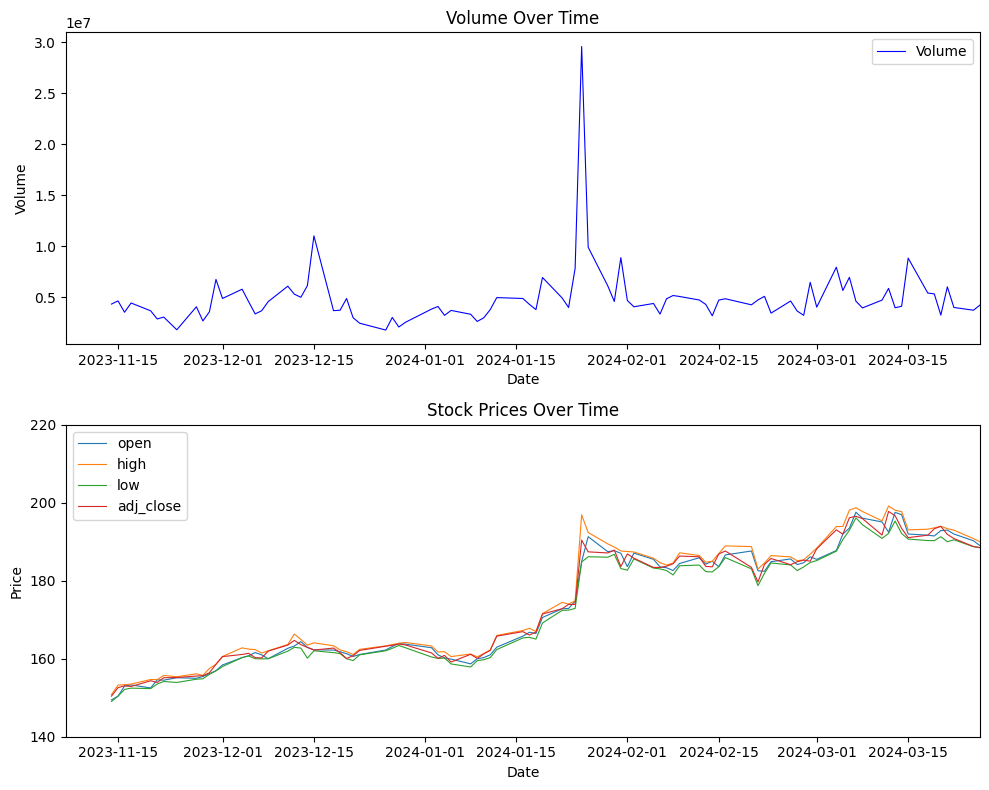

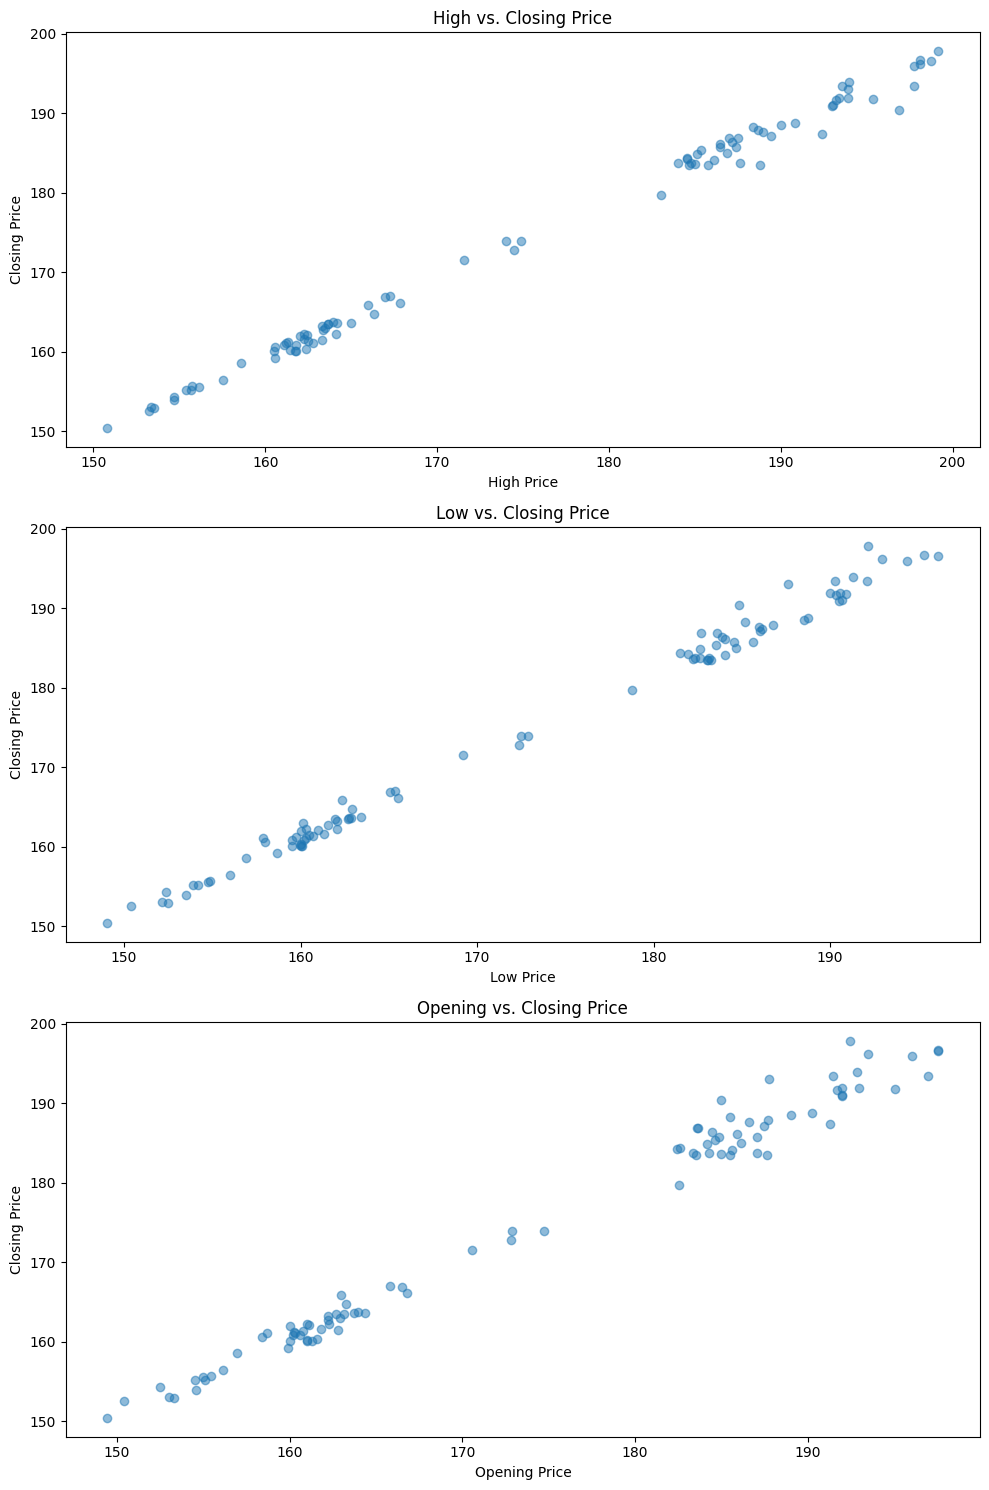

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming 'train_set' is your dataframe as you've constructed from the API response
# First, let's print the column names excluding 'date'
print("Columns excluding 'date':", train_set.columns.drop('date'))

# Check data types and convert if necessary
train_set[['open', 'high', 'low', 'adj_close', 'volume']] = train_set[['open', 'high', 'low', 'adj_close', 'volume']].apply(pd.to_numeric)

# Plotting volume separately
plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
plt.plot(train_set['date'], train_set['volume'], label='Volume', color='blue', linewidth=0.8)
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Volume Over Time')
plt.xlim(pd.Timestamp('2023-11-07'), pd.Timestamp('2024-03-26'))  # Set x-axis limits
plt.legend()

# Plotting other columns together
plt.subplot(2, 1, 2)
columns = ['open', 'high', 'low', 'adj_close']
for col in columns:
    plt.plot(train_set['date'], train_set[col], label=col, linewidth=0.8)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Prices Over Time')
plt.xlim(pd.Timestamp('2023-11-07'), pd.Timestamp('2024-03-26'))  # Set x-axis limits
plt.ylim(180, 220)  # Set y-axis limits
plt.yticks(np.arange(140, 221, 20))  # Set y-axis ticks with interval of 10
plt.legend()

plt.tight_layout()
plt.show()

# Scatter plots for relationships
fig, axs = plt.subplots(3, 1, figsize=(10, 15))  # 3 rows, 1 column

# High vs. Closing Price
axs[0].scatter(train_set['high'], train_set['adj_close'], alpha=0.5)  # Remove regression line
axs[0].set_title('High vs. Closing Price')
axs[0].set_xlabel('High Price')
axs[0].set_ylabel('Closing Price')

# Low vs. Closing Price
axs[1].scatter(train_set['low'], train_set['adj_close'], alpha=0.5)  # Remove regression line
axs[1].set_title('Low vs. Closing Price')
axs[1].set_xlabel('Low Price')
axs[1].set_ylabel('Closing Price')

# Open vs. Closing Price
axs[2].scatter(train_set['open'], train_set['adj_close'], alpha=0.5)  # Remove regression line
axs[2].set_title('Opening vs. Closing Price')
axs[2].set_xlabel('Opening Price')
axs[2].set_ylabel('Closing Price')

plt.tight_layout()
plt.show()


In [5]:
#Question 3- Analysis of graph
# The last 3 graphs are all linear. The first one is not linear. 

Columns excluding 'date': Index(['open', 'high', 'low', 'adj_close', 'volume'], dtype='object')


/var/folders/gy/m_30g3cj17sd25c86bdgwhbw0000gn/T/ipykernel_412/2817841936.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set[['open', 'high', 'low', 'adj_close', 'volume']] = train_set[['open', 'high', 'low', 'adj_close', 'volume']].apply(pd.to_numeric)


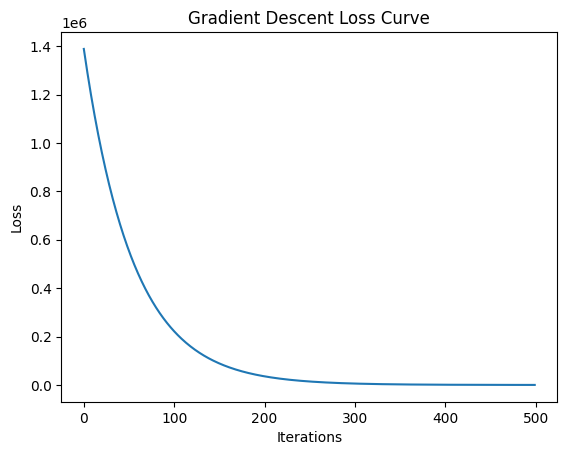

Learned Weights:
Bias → 172.30709120297743
High → 4.940309571656129
Open → 4.6033778952797615
Low → 4.846458464387478


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'train_set' is your dataframe as you've constructed from the API response
# First, let's print the column names excluding 'date'
print("Columns excluding 'date':", train_set.columns.drop('date'))

# Check data types and convert if necessary
train_set[['open', 'high', 'low', 'adj_close', 'volume']] = train_set[['open', 'high', 'low', 'adj_close', 'volume']].apply(pd.to_numeric)

# Define independent and dependent variables
X = train_set[['high', 'open', 'low']].values
y = train_set['adj_close'].values

# Standardize the data
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_scaled = (X - X_mean) / X_std

# Add a column of ones to X_scaled for the bias term
X_scaled = np.column_stack((X_scaled, np.ones(X_scaled.shape[0])))

# Define gradient descent function
def multivariate_grad_descent(X, y, T, alpha):
    m, n = X.shape
    theta = np.zeros(n)
    loss = np.zeros(T)
    for i in range(T):
        loss[i] = 0.5 * np.linalg.norm(X.dot(theta) - y) ** 2
        gradient = X.T.dot(X.dot(theta) - y)
        theta = theta - alpha * gradient
    return theta, loss

# Define parameters for gradient descent
T = 500
alpha = 0.0001

# Learn weights using Gradient Descent
theta, loss = multivariate_grad_descent(X_scaled, y, T, alpha)

# Plot loss curve
plt.plot(range(T), loss)
plt.ylabel("Loss")
plt.xlabel("Iterations")
plt.title("Gradient Descent Loss Curve")
plt.show()

# Print learned weights
print("Learned Weights:")
print("Bias →", theta[-1])
print("High →", theta[0])
print("Open →", theta[1])
print("Low →", theta[2])


In [7]:
# Using the learned weights and bias to predict closing prices for the test set
X_test = test_set[['high', 'open', 'low']].values
X_test_scaled = (X_test - X_mean) / X_std  # Scale the test set features using mean and standard deviation from training set
X_test_scaled = np.column_stack((X_test_scaled, np.ones(X_test_scaled.shape[0])))  # Add bias term
y_pred = X_test_scaled.dot(theta)

# List out the predicted closing prices for each day in the test set
print("Predicted closing prices for each day in the test set:")
for i in range(len(test_set)):
    print("Day {}: {}".format(i+1, y_pred[i]))

# Calculate Mean Squared Error (MSE)
mse = np.mean((y_pred - test_set['adj_close']) ** 2)
print("\nMean Squared Error (MSE):", mse)

# Explanation for MSE value:
print("\nExplanation for MSE value:")
print("The MSE measures the average squared difference between the predicted closing prices and the actual closing prices.")
print("A lower MSE indicates that the model's predictions are closer to the actual values.")


TypeError: unsupported operand type(s) for -: 'str' and 'float'